In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Import the data
pred_states_df = pd.read_csv("states_energy_merged.csv")
pred_states_df.head()

,State,Year,production,consumption,price,population
0,Alaska,1970,8835.0,182039,1.39,304
1,Alabama,1970,132471.0,1393497,1.37,3451
2,Arkansas,1970,56933.0,708904,1.51,1932
3,Arizona,1970,68919.0,520401,1.97,1792
4,California,1970,521978.0,5499139,1.74,20007


In [3]:
# Dropping consumption column

pred_states_df = pred_states_df.drop(['consumption'], axis=1)

pred_states_df.head()

,State,Year,production,price,population
0,Alaska,1970,8835.0,1.39,304
1,Alabama,1970,132471.0,1.37,3451
2,Arkansas,1970,56933.0,1.51,1932
3,Arizona,1970,68919.0,1.97,1792
4,California,1970,521978.0,1.74,20007


In [4]:
# test state data for Illinois

test_df = pred_states_df.loc[(pred_states_df['Year'] >= 2000) & (pred_states_df['State'] == 'Illinois')]
display(test_df.head())


test_df.loc[test_df['Year'] == 2020, 'production'].values[0]

,State,Year,production,price,population
1544,Illinois,2000,109798.0,10.47,12434
1595,Illinois,2001,113177.0,11.10,12488
1646,Illinois,2002,140268.0,10.13,12526
1697,Illinois,2003,159433.0,11.25,12556
1748,Illinois,2004,154367.0,12.47,12590


381252.0

#Multiple linear regression test for Illinois

In [5]:
#find the future value of production for Illinois

# Select X & y values
X = test_df[['Year']].values.reshape(-1,1)
y = test_df[['production']].values.reshape(-1,1)

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (21, 1)
y shape: (21, 1)


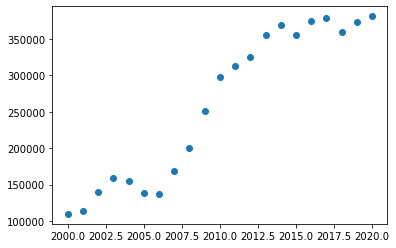

In [6]:
# Plot the data 

plt.scatter(X,y)

In [7]:
# Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
# Creating a Linear Regression(LR) model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Calculate the model's scores

trng_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {trng_score}")
print(f"Testing Score: {trng_score}")

Training Score: 0.8700491814740372
Testing Score: 0.8700491814740372


In [10]:
# Use the model to make predictions

predicted = model.predict(X_test)

In [11]:
# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


predictions = model.predict(X_test[:5])
print(f"Predicted classes: {predictions}")

n_2025 = model.predict([[2025]])
n_2030 = model.predict([[2030]])
n_2035 = model.predict([[2035]])

print('''''')
print(f"Illinois Renewable Energy Production in 2020: {int(test_df.loc[test_df['Year'] == 2020, 'production'].values[0])}")

print('''''')      
print(f'Prediction for 2025: {int(n_2025[0][0])}')
      
print('''''')      
print(f'Prediction for 2030: {int(n_2030[0][0])}')
      
print('''''')      
print(f'Prediction for 2030: {int(n_2035[0][0])}')

Mean Squared Error (MSE): 561342883.7617489
R-squared (R2): 0.9544912218464976
Predicted classes: [[105095.56723992]
 [372964.51451931]
 [341450.52072173]
 [120852.56413871]
 [231151.54243022]]

Illinois Renewable Energy Production in 2020: 381252

Prediction for 2025: 499020

Prediction for 2030: 577805

Prediction for 2030: 656590


In [12]:
# Import the data
pred_states_df = pd.read_csv("states_energy_merged.csv")



In [13]:
#
pred_states_df2 = pd.read_csv("states_energy_merged.csv")
pred_states_df2['difference'] = pred_states_df["production"]- pred_states_df["consumption"]
pred_states_df1 = pred_states_df2.drop("consumption", axis = 1)
pred_states_df1.head()

,State,Year,production,price,population,difference
0,Alaska,1970,8835.0,1.39,304,-173204.0
1,Alabama,1970,132471.0,1.37,3451,-1261026.0
2,Arkansas,1970,56933.0,1.51,1932,-651971.0
3,Arizona,1970,68919.0,1.97,1792,-451482.0
4,California,1970,521978.0,1.74,20007,-4977161.0


In [14]:
# Dropping consumption column
#pred_states_df = pred_states_df.drop(['consumption'], axis=1)

pred_states_df.head()

,State,Year,production,consumption,price,population
0,Alaska,1970,8835.0,182039,1.39,304
1,Alabama,1970,132471.0,1393497,1.37,3451
2,Arkansas,1970,56933.0,708904,1.51,1932
3,Arizona,1970,68919.0,520401,1.97,1792
4,California,1970,521978.0,5499139,1.74,20007


In [15]:
##run loop to make predictions for all features for all states
states = pred_states_df["State"].unique()

pred_state_dicts = {}

for state in states:

    df = pred_states_df.loc[pred_states_df['State'] == state]
    df1 = pred_states_df1.loc[pred_states_df1['State'] == state]
    
    ### Make predictions for all the features
    
    #population predictions

    X2 = df['Year'].values.reshape(-1,1)
    y2 = df['population'].values.reshape(-1,1)


    X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state= 42)

    # Create and fit the models 
    model2 = LinearRegression()
    model2.fit(X2_train, y2_train)

    # run testing & training scores
    trng_score = model2.score(X2_train, y2_train)
    testing_score = model2.score(X2_test, y2_test)

    # use the model to make prediction
    predicted1 = model2.predict(X2_test)

    # calculate the mse and r2 score
    mse2 = mean_squared_error(y2_test, predicted1)
    r2 = r2_score(y2_test, predicted1)

    # get population predictions for 2021 to 2035
    pop_predictions = []
    for p in range(2021, 2036):
        p_prediction = model2.predict([[p]])
        pop_predictions.append(float(p_prediction))
        
        
#     df = pred_states_df.loc[pred_states_df['State'] == state]  

    
   #renewable energy production predictions

    X3 = df['Year'].values.reshape(-1,1)
    y3 = df['production'].values.reshape(-1,1)


    X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state= 42)

    # Create and fit the models
    model3 = LinearRegression()
    model3.fit(X3_train, y3_train)

     # run testing & training scores
    trng_score3 = model3.score(X3_train, y3_train)
    testing_score3 = model3.score(X3_test, y3_test)

    # make predictions based on model
    predicted3 = model3.predict(X3_test)

     # calculate the mse and r2 score
    mse3 = mean_squared_error(y3_test, predicted3)
    r2 = r2_score(y3_test, predicted3)

    # get re production predictions for 2021 to 2035
    rp_predictions = []
    for l in range(2021, 2036):
        l_prediction = model3.predict([[l]])
        rp_predictions.append(float(l_prediction))
        
        
  #Energy Price Prediction

    X4 = df['Year'].values.reshape(-1,1)
    y4 = df['price'].values.reshape(-1,1)


    X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, random_state=42)

     # Create and fit the model
    model4 = LinearRegression()
    model4.fit(X4_train, y4_train)

     # run testing & training scores
    trng_score4 = model4.score(X4_train, y4_train)
    testing_score4 = model4.score(X4_test, y4_test)

    # make predictions based on model
    predicted4 = model4.predict(X4_test)

    # calculate the mse and r2 score
    mse4 = mean_squared_error(y4_test, predicted4)
    r2 = r2_score(y4_test, predicted4)

    # get price predictions for 2021 to 2035
    ep_predictions = []
    for d in range(2021, 2036):
        d_prediction = model4.predict([[d]])
        ep_predictions.append(float(d_prediction))
        
    
    #Total consumption Predictions 

    X5 = df['Year'].values.reshape(-1,1)
    y5 = df['consumption'].values.reshape(-1,1)


    X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, random_state=42)

    # Create and fit the models
    model5 = LinearRegression()
    model5.fit(X5_train, y5_train)

     # run testing & training scores
    trng_score5 = model5.score(X5_train, y5_train)
    testing_score5 = model5.score(X5_test, y5_test)

    # make predictions based on model
    predicted5 = model5.predict(X5_test)

    # calculate the mse and r2 score
    mse5 = mean_squared_error(y5_test, predicted5)
    r2 = r2_score(y5_test, predicted5)

    # get total consumption predictions for 2021 to 2035
    consume_predictions = []
    for c in range(2021, 2036):
        c_prediction = model5.predict([[c]])
        consume_predictions.append(float(c_prediction))
    
    
    
     #energy difference predictions for DF that removes consumption 

        
    X6 = df1['Year'].values.reshape(-1,1)
    y6 = df1['difference'].values.reshape(-1,1)


    X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, random_state=42)

    # Create and fit the model
    model6 = LinearRegression()
    model6.fit(X6_train, y6_train)

    # run testing & training scores
    trng_score6 = model6.score(X6_train, y6_train)
    testing_score6 = model6.score(X6_test, y6_test)

    # make predictions based on model
    predicted6 = model6.predict(X6_test)

    # calculate the mse and r2 score
    mse6 = mean_squared_error(y6_test, predicted6)
    r2 = r2_score(y6_test, predicted6)

    # get energy difference predictions for 2021 to 2035
    ed_predictions = []
    for x in range(2021, 2036):
        x_prediction = model6.predict([[x]])
        ed_predictions.append(float(x_prediction))
    
        
    # Update States Dictionary
    pred_state_dicts.update({state: {
                        'state': list([state] * len(range(2021, 2036))),
                        'year': list(range(2021, 2036)),
                        'produced_renewable': rp_predictions,
                        'population': pop_predictions,
                        'energy_price': ep_predictions,
                        'total_consumed': consume_predictions,
                        'difference': ed_predictions
                        }})
pred_state_dicts 


{'Alaska': {'state': ['Alaska',
   'Alaska',
   'Alaska',
   'Alaska',
   'Alaska',
   'Alaska',
   'Alaska',
   'Alaska',
   'Alaska',
   'Alaska',
   'Alaska',
   'Alaska',
   'Alaska',
   'Alaska',
   'Alaska'],
  'year': [2021,
   2022,
   2023,
   2024,
   2025,
   2026,
   2027,
   2028,
   2029,
   2030,
   2031,
   2032,
   2033,
   2034,
   2035],
  'produced_renewable': [22154.320088477165,
   22419.788103672152,
   22685.25611886714,
   22950.724134062126,
   23216.192149257113,
   23481.6601644521,
   23747.128179647087,
   24012.596194842074,
   24278.06421003706,
   24543.532225232047,
   24809.000240427034,
   25074.46825562202,
   25339.93627081701,
   25605.404286011995,
   25870.872301206982],
  'population': [808.8134799403742,
   817.8440558431794,
   826.8746317459809,
   835.905207648786,
   844.9357835515875,
   853.9663594543927,
   862.9969353571942,
   872.0275112599993,
   881.0580871628008,
   890.0886630656059,
   899.1192389684074,
   908.1498148712126,
  

In [16]:
pred_states_df2 = pred_states_df2.rename(columns={'State': 'state','Year':'year', 'production': 'produced_renewable', 'consumption': 'total_consumed', 'price': 'energy_price'})
pred_states_df2

,state,year,produced_renewable,total_consumed,energy_price,population,difference
0,Alaska,1970,8835.0,182039,1.39,304,-173204.0
1,Alabama,1970,132471.0,1393497,1.37,3451,-1261026.0
2,Arkansas,1970,56933.0,708904,1.51,1932,-651971.0
3,Arizona,1970,68919.0,520401,1.97,1792,-451482.0
4,California,1970,521978.0,5499139,1.74,20007,-4977161.0
...,...,...,...,...,...,...,...
2596,Vermont,2020,37481.0,125702,20.52,642,-88221.0
2597,Washington,2020,871240.0,1779399,17.60,7719,-908159.0
2598,Wisconsin,2020,200946.0,1708131,15.50,5892,-1507185.0
2599,West Virginia,2020,41440.0,803921,16.47,1790,-762481.0


In [17]:
# Create Dictionary of DataFrames
dfs = {}
for state in pred_state_dicts:
    dfs.update({state: pd.DataFrame(pred_state_dicts[state])})

# Append new DataFrames to previous states_df
for state in dfs:
    pred_states_df2 = pred_states_df2.append(dfs[state],ignore_index=True)


pred_states_df2 = pred_states_df2.sort_values(by=["state","year"])
pred_states_df2

,state,year,produced_renewable,total_consumed,energy_price,population,difference
1,Alabama,1970,132471.000000,1.393497e+06,1.370000,3451.000000,-1.261026e+06
52,Alabama,1971,158182.000000,1.384940e+06,1.510000,3497.000000,-1.226758e+06
103,Alabama,1972,164946.000000,1.478039e+06,1.610000,3539.000000,-1.313093e+06
154,Alabama,1973,181706.000000,1.527209e+06,1.840000,3580.000000,-1.345503e+06
205,Alabama,1974,166734.000000,1.547657e+06,2.500000,3626.000000,-1.380923e+06
...,...,...,...,...,...,...,...
3361,Wyoming,2031,52718.343221,6.286485e+05,20.540020,644.452304,-5.759301e+05
3362,Wyoming,2032,53551.776752,6.344924e+05,20.865858,648.787450,-5.809406e+05
3363,Wyoming,2033,54385.210284,6.403363e+05,21.191696,653.122595,-5.859511e+05
3364,Wyoming,2034,55218.643815,6.461803e+05,21.517535,657.457741,-5.909616e+05


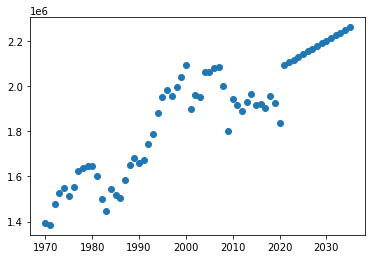

In [18]:
X= pred_states_df2.loc[pred_states_df2['state'] == "Alabama"]

# Plot the data
plt.scatter(X['year'],X['total_consumed'])

In [ ]:
pred_states_df2.to_csv("static/csv/states_full_data.csv", float_format='%.1f')